In [9]:
import pandas as pd
# import dataset
df=pd.read_csv('breast_cancer.csv')
# Display first few rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
# Display column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
# Check for null values
df.isnull().any()

,0
id,False
diagnosis,False
radius_mean,False
texture_mean,False
perimeter_mean,False
area_mean,False
smoothness_mean,False
compactness_mean,False
concavity_mean,False
concave points_mean,False


In [12]:
df = df.drop('Unnamed: 32', axis=1)


In [13]:
# Check for the target variable value count
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [14]:
# Encode the target variable
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Verify the changes
df['diagnosis'].head()


,diagnosis
0,1
1,1
2,1
3,1
4,1


In [15]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('diagnosis', axis=1)  # Features
y = df['diagnosis']              # Target

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the sizes of the splits
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (455, 31)
Test set size: (114, 31)


In [16]:
# Importing essential libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<ipython-input-17-fdfb3b84688d>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  g = df.hist(ax=ax)


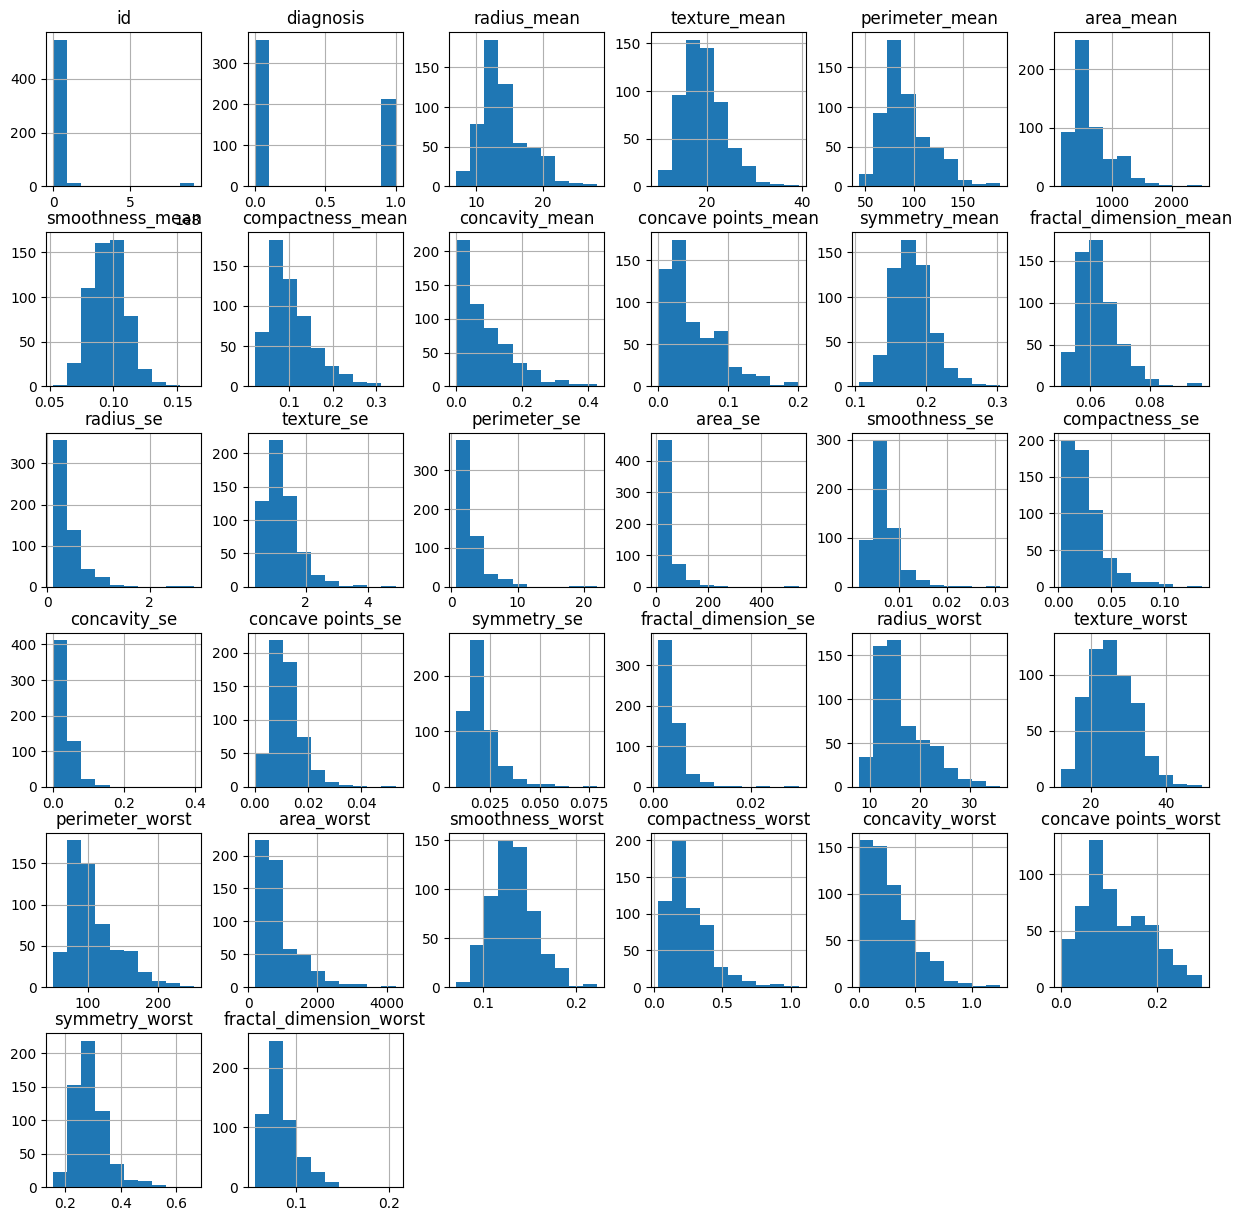

In [17]:
# Plotting histogram for the entire dataset
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
g = df.hist(ax=ax)

<Figure size 1500x1200 with 0 Axes>

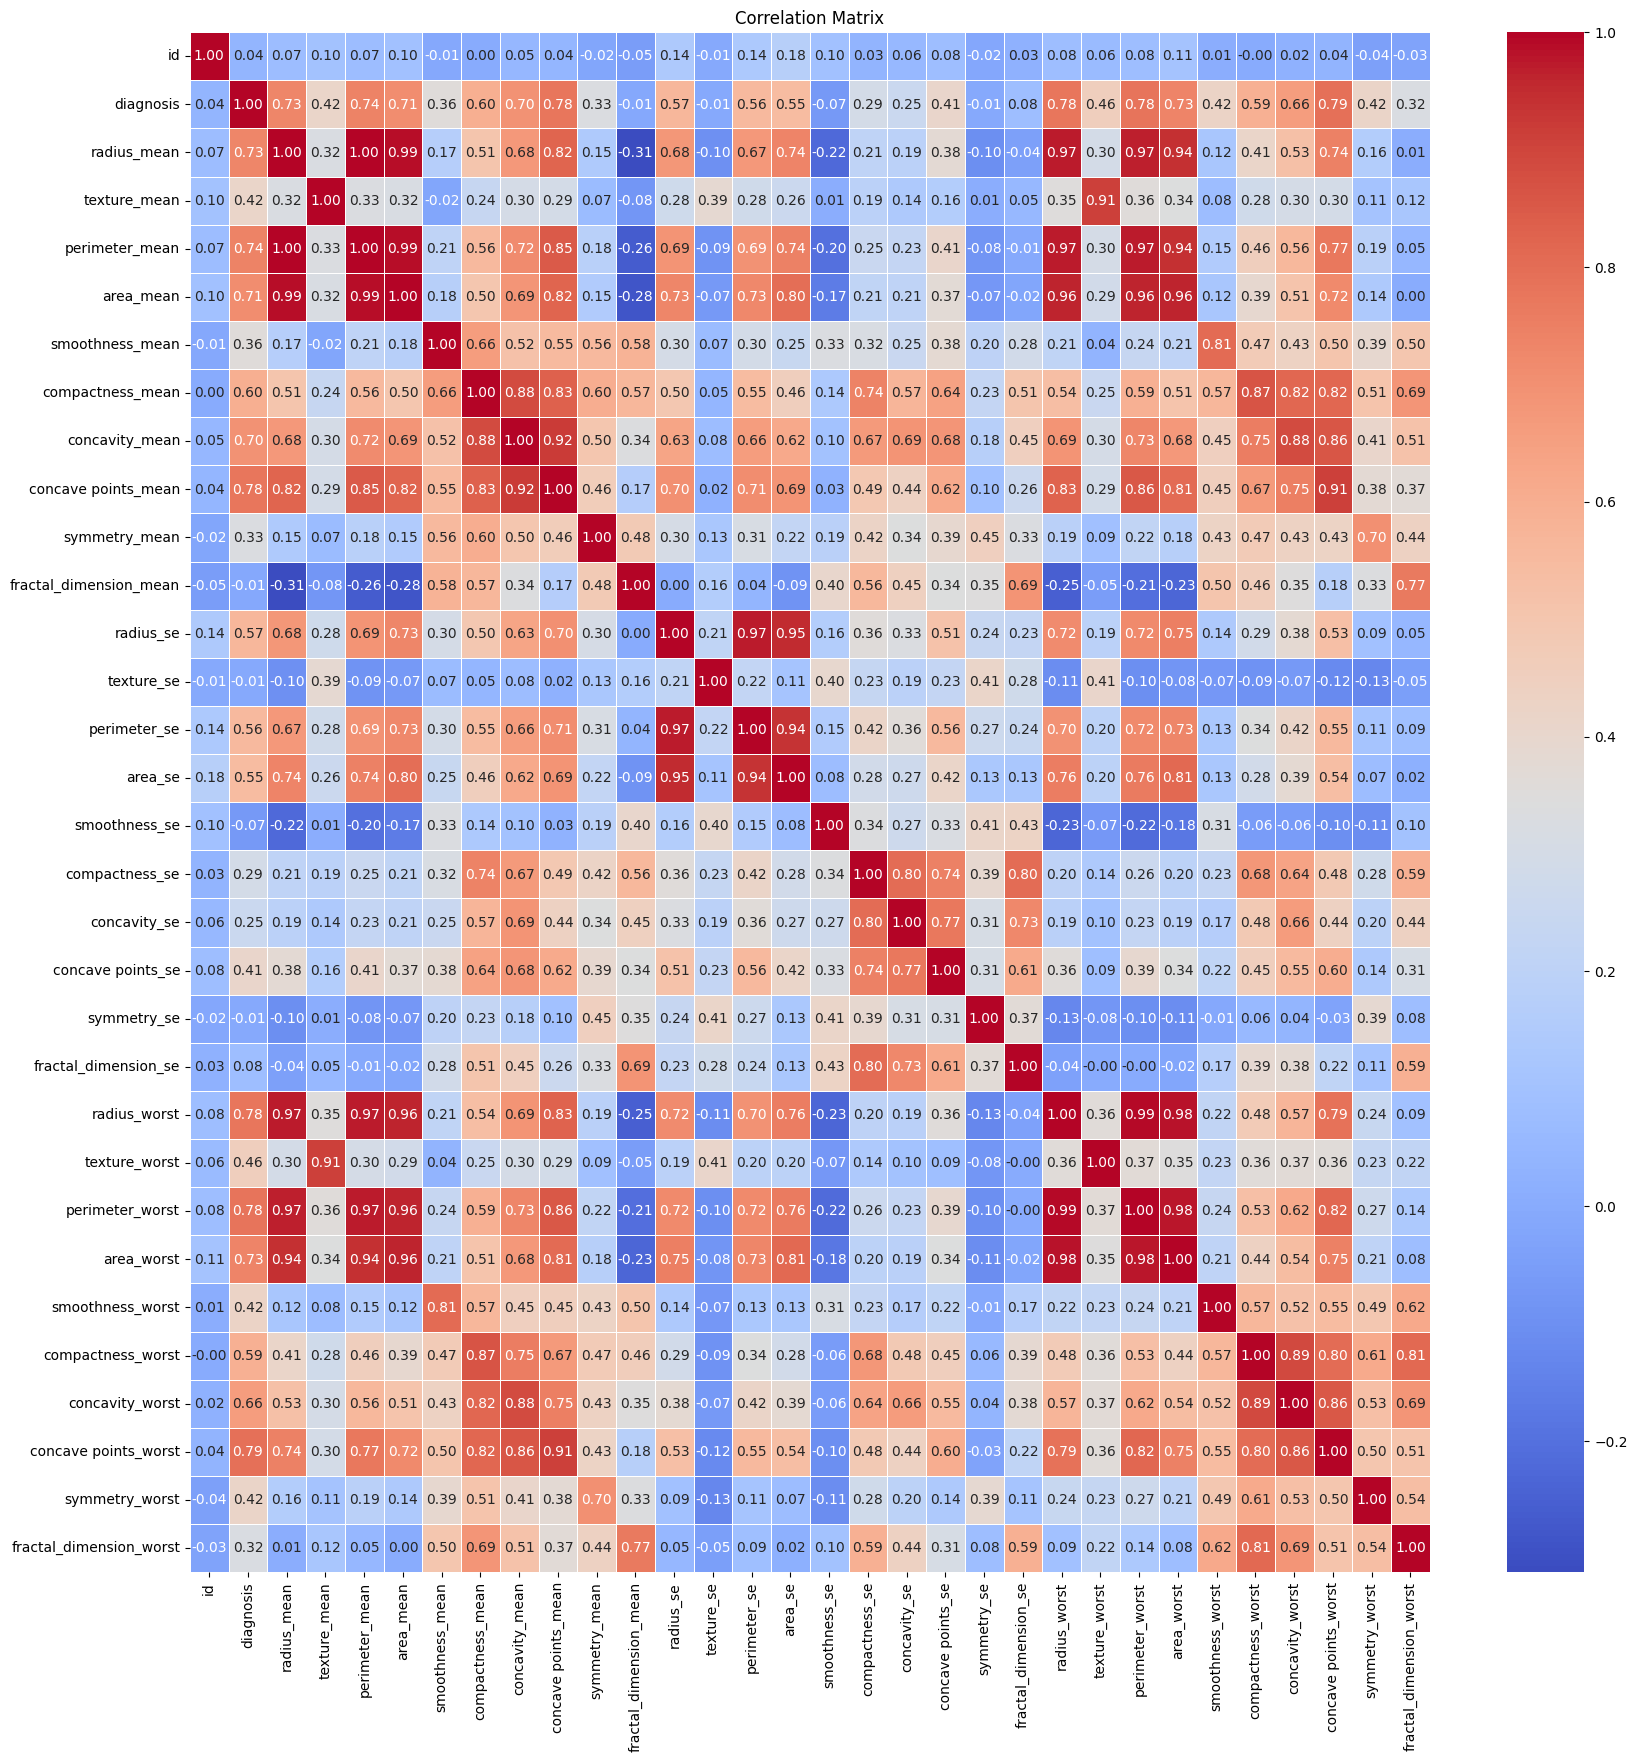

In [18]:
# Plotting the correlation matrix heatmap
plt.figure(figsize=(15, 12))
correlation_matrix = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


<ipython-input-19-2cb2f702c909>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='coolwarm')


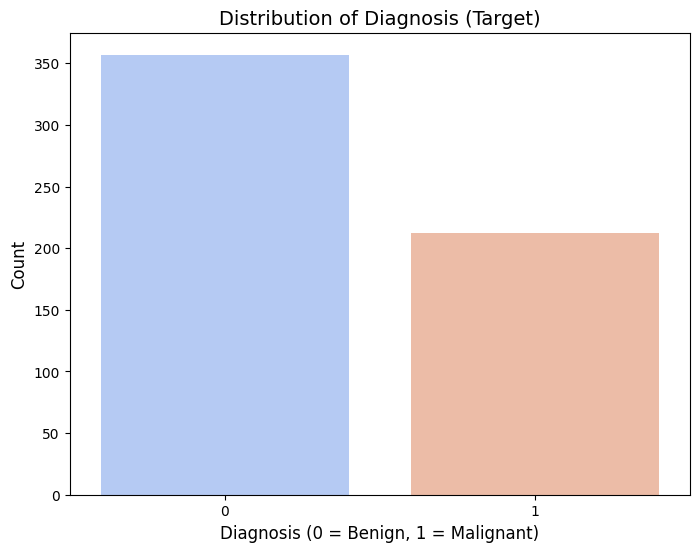

In [19]:
# Visualization to check if the dataset is balanced or not
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df, palette='coolwarm')
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Diagnosis (Target)', fontsize=14)
plt.show()


In [21]:
# Drop features with high correlation
import numpy as np
correlation_threshold = 0.9  # Choose a threshold for removing highly correlated features
corr_matrix = df.corr()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with high correlation
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]

print(f"Features to drop due to high correlation: {to_drop}")

# Drop those columns
df = df.drop(columns=to_drop)
print(f"Remaining features: {df.columns}")


Features to drop due to high correlation: ['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']
Remaining features: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [24]:
print(df.columns)


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [25]:
features_to_drop = ['perimeter_mean', 'area_mean', 'concave points_mean',
                    'perimeter_se', 'area_se', 'radius_worst',
                    'texture_worst', 'perimeter_worst', 'area_worst',
                    'concave points_worst']

missing_features = [col for col in features_to_drop if col not in df.columns]
print("Missing features:", missing_features)


Missing features: ['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']


In [26]:
# Drop only the columns that exist in the DataFrame
df = df.drop(columns=[col for col in features_to_drop if col in df.columns])

# Verify the updated DataFrame
print(df.columns)


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [27]:
# Separate features and target
X = df.drop(columns=['id', 'diagnosis'])  # Remove ID and target variable from features
y = df['diagnosis']                      # Target variable

# Split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (455, 20)
Test set shape: (114, 20)


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train the model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



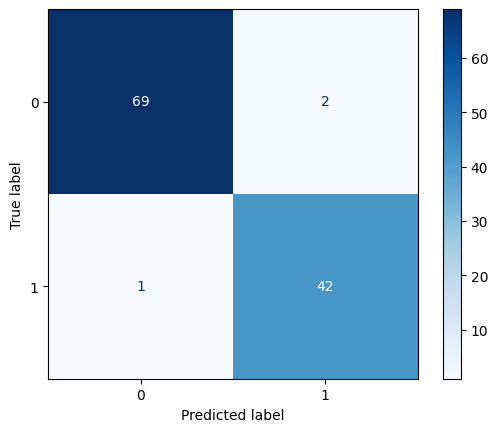

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


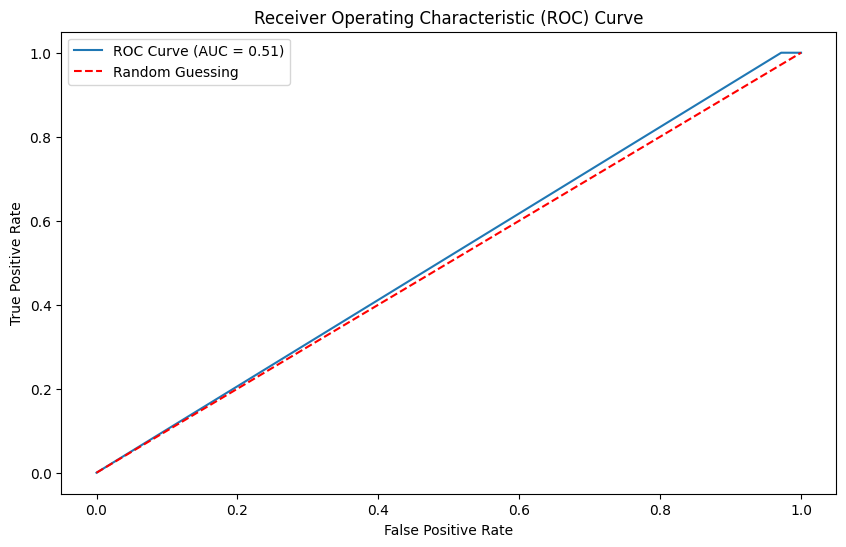

In [32]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label="Random Guessing")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [33]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dtc.fit(X_train, y_train)

# Predict on the test data
y_pred_dtc = dtc.predict(X_test)

# Calculate accuracy and classification report
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print(f"Decision Tree Classifier Accuracy: {accuracy_dtc}")
print("Classification Report:")
print(classification_report(y_test, y_pred_dtc))


Decision Tree Classifier Accuracy: 0.9122807017543859
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        71
           1       0.87      0.91      0.89        43

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [34]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rfc.fit(X_train, y_train)

# Predict on the test data
y_pred_rfc = rfc.predict(X_test)

# Calculate accuracy and classification report
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(f"Random Forest Classifier Accuracy: {accuracy_rfc}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rfc))


Random Forest Classifier Accuracy: 0.9649122807017544
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the KNeighbors Classifier with the number of neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred_knn = knn.predict(X_test)

# Calculate accuracy and classification report
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNeighbors Classifier Accuracy: {accuracy_knn}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


KNeighbors Classifier Accuracy: 0.9210526315789473
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        71
           1       0.93      0.86      0.89        43

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



In [36]:
print(f"KNeighbors Classifier Accuracy: {accuracy_knn}")
print(f"Decision Tree Classifier Accuracy: {accuracy_dtc}")
print(f"Random Forest Classifier Accuracy: {accuracy_rfc}")


KNeighbors Classifier Accuracy: 0.9210526315789473
Decision Tree Classifier Accuracy: 0.9122807017543859
Random Forest Classifier Accuracy: 0.9649122807017544


In [37]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for KNeighborsClassifier
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# GridSearchCV for KNeighborsClassifier
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for KNeighborsClassifier:", grid_knn.best_params_)
print("Best score for KNeighborsClassifier:", grid_knn.best_score_)


Best parameters for KNeighborsClassifier: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Best score for KNeighborsClassifier: 0.9098901098901099


In [38]:
# Hyperparameter grid for DecisionTreeClassifier
param_grid_dtc = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for DecisionTreeClassifier
grid_dtc = GridSearchCV(DecisionTreeClassifier(), param_grid_dtc, cv=5, scoring='accuracy')
grid_dtc.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for DecisionTreeClassifier:", grid_dtc.best_params_)
print("Best score for DecisionTreeClassifier:", grid_dtc.best_score_)


Best parameters for DecisionTreeClassifier: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best score for DecisionTreeClassifier: 0.9054945054945055


In [39]:
# Hyperparameter grid for RandomForestClassifier
param_grid_rfc = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for RandomForestClassifier
grid_rfc = GridSearchCV(RandomForestClassifier(), param_grid_rfc, cv=5, scoring='accuracy')
grid_rfc.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for RandomForestClassifier:", grid_rfc.best_params_)
print("Best score for RandomForestClassifier:", grid_rfc.best_score_)


Best parameters for RandomForestClassifier: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best score for RandomForestClassifier: 0.9626373626373628
